In [49]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from scipy import integrate


In [50]:
DATA_PATH = "./data/features/flux_v3/"

In [51]:
diego_t = pd.read_pickle(DATA_PATH+"/T.pickle")
diego_nt = pd.read_pickle(DATA_PATH+"/NT.pickle")

In [52]:
diego_t['bin_class'] = diego_t['Class']=="SN"
diego_t["fact_Class"] = pd.factorize(diego_t['bin_class'])[0]
diego_nt['bin_class'] = diego_nt['Class']=="SN"
diego_nt["fact_Class"] = pd.factorize(diego_nt['bin_class'])[0]

In [53]:
diego_t.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1409030010044114444,0,SN?,13,6.606619e-20,0.153846,0.067363,0.145074,0.159700,0.296120,0.519169,0,...,-4.924016e-26,-3.251950e-29,4.063888e-32,0,-3.927273,3.625611e-20,2.653184,0.674821,False,0
TranID1209210010044118805,0,Flare,68,4.046382e-17,0.014706,0.043604,0.077573,0.111773,0.140895,0.215354,0,...,7.742926e-24,1.676101e-28,-3.274201e-30,0,-3.139161,9.811163e-18,351.818004,0.715629,False,0
TranID1310250040014131234,0,SN,185,4.205281e-18,0.043243,0.025245,0.061235,0.082459,0.126591,0.314544,0,...,-1.044870e-24,5.970998e-28,6.915890e-31,0,-3.049541,1.364362e-18,21.488547,0.663141,True,1
TranID801010040034114166,0,Var?,26,1.704704e-19,0.038462,0.178109,0.267323,0.307942,0.636355,0.910583,0,...,8.845517e-26,4.664982e-30,-3.847573e-32,0,-3.396739,6.714612e-20,5.465193,0.710980,False,0
TranID1011080040044131101,0,SN,41,3.023817e-19,0.121951,0.031154,0.055487,0.073229,0.405480,0.874745,0,...,-1.303991e-25,-2.135346e-29,6.109557e-32,0,-3.238866,1.047484e-19,10.394458,0.710591,True,1


In [54]:
diego_nt.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
CataID1121048016765,0,non-transient,37,2.333440e-20,0.081081,0.085689,0.139318,0.186693,0.273474,0.379936,0,...,-1.227713e-27,-6.351738e-30,-2.764374e-33,0,-3.267227,8.182450e-21,0.961691,0.413107,False,0
CataID1121048016959,0,non-transient,162,7.375637e-20,0.117284,0.121476,0.216808,0.321775,0.543173,0.720385,0,...,3.435789e-27,5.131534e-31,-2.966116e-33,0,-3.056722,1.718766e-20,1.165157,0.638360,False,0
CataID1112021056668,0,non-transient,25,8.243111e-20,0.120000,0.074063,0.118072,0.167083,0.239397,0.649333,0,...,-1.019394e-25,-3.455726e-30,8.090981e-32,0,-3.415020,4.244134e-20,1.720962,0.687566,False,0
CataID1112021056680,0,non-transient,342,1.607906e-18,0.318713,0.089792,0.222260,0.329158,0.509584,0.750055,0,...,-1.461579e-25,-6.128517e-29,1.091448e-31,0,-3.026575,4.551548e-19,0.182665,0.501163,False,0
CataID1112021056719,0,non-transient,368,1.262493e-17,0.271739,0.131166,0.262401,0.393776,0.525359,0.789431,0,...,1.956175e-24,-1.700624e-28,-9.859054e-31,0,-3.024680,2.825978e-18,0.064208,0.768530,False,0


### Scramble the data

In [55]:
diego_t = diego_t.sample(frac=1)
diego_nt = diego_nt.sample(frac=1)

In [56]:
all_train, all_test= train_test_split(diego_t,test_size = 0.25)

It never hurts to rescramble....

In [57]:
all_train = all_train.sample(frac=1)
all_test = all_test.sample(frac=1)

In [58]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [59]:
print(len(y_train))
print(len(y_test))


35219
11740


## Train the algorithm

In [60]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [61]:
clf.score(all_test[features],y_test)

0.7958262350936968

In [62]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,7355,1622
1,775,1988


Text(0,0.5,'precision')

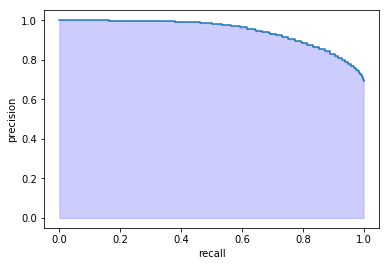

In [63]:
# plt.style.use(['dark_background'])
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')


In [64]:
integrate.trapz(precision[::-1],recall[::-1])

0.9439933925956634

In [66]:

f1_score(np.array(preds),np.array(y_test))

0.6238820021967677

# Lets mix the non-transients

In [67]:
alldata = pd.concat([diego_t,diego_nt])

In [68]:
alldata = alldata.sample(frac=1)

In [69]:
all_train, all_test= train_test_split(alldata,test_size = 0.25)

In [70]:
all_train = all_train.sample(frac=1)
all_test = all_test.sample(frac=1)

In [71]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [72]:
print(len(y_train))
print(len(y_test))


46614
15538


In [73]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [74]:
clf.score(all_test[features],y_test)

0.8383961899858412

In [75]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,11441,1895
1,616,1586


Text(0,0.5,'precision')

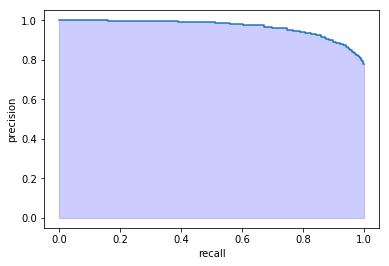

In [76]:
# plt.style.use(['dark_background'])
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')


In [77]:
integrate.trapz(precision[::-1],recall[::-1])

0.9655452816602347

In [78]:
f1_score(np.array(preds),np.array(y_test))

0.558155903572057